# Stock Price Prediction and Forecasting Using Stacked LSTM - Deep Learning

In [1]:
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
import yfinance as yf
%matplotlib inline
from keras.preprocessing.sequence import TimeseriesGenerator
import plotly.graph_objects as go
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [2]:
# Historical Carnival Cruise Stock Price:
# OHLCV using yfinance
# Load the stocks data
ccl = yf.download("CCL", start="2016-01-01", end="2021-01-21", 
    index_col="Date", infer_datetime_format=True, parse_dates=True)
ccl.dropna(inplace=True)
#ccl.head()

[*********************100%***********************]  1 of 1 completed


In [3]:
# Historical Delta Airlines Stock Price:
# OHLCV using yfinance
# Load the stocks data
dal = yf.download("DAL", start="2016-01-01", end="2021-01-21", 
    index_col="Date", infer_datetime_format=True, parse_dates=True)
dal.dropna(inplace=True)
#dal.head()

[*********************100%***********************]  1 of 1 completed


In [4]:
# Historical ETSY Stock Price:
# OHLCV using yfinance
# Load the stocks data
etsy = yf.download("ETSY", start="2016-01-01", end="2021-01-21", 
    index_col="Date", infer_datetime_format=True, parse_dates=True)
etsy.dropna(inplace=True)
#etsy.head()

[*********************100%***********************]  1 of 1 completed


In [92]:
# Historical L Brands Stock Price:
# OHLCV using yfinance
# Load the stocks data
PP = yf.download("PYPL", start="2016-01-01", end="2021-01-21", 
    index_col="Date", infer_datetime_format=True, parse_dates=True)
PP.dropna(inplace=True)
#PP.head()

[*********************100%***********************]  1 of 1 completed


In [7]:
# Historical SPY Stock Price:
# OHLCV using yfinance
# Load the stocks data
spy = yf.download("SPY", start="2016-01-01", end="2021-01-21", 
    index_col="Date", infer_datetime_format=True, parse_dates=True)
spy.dropna(inplace=True)
#spy.head()

[*********************100%***********************]  1 of 1 completed


In [9]:
covid_spy = spy['2020-02-21' :'2021-01-22']
covid_spy.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-02-21,335.470001,335.809998,332.579987,333.480011,327.366516,113788200
2020-02-24,323.140015,333.559998,321.239990,322.420013,316.509247,161088400
2020-02-25,323.940002,324.609985,311.690002,312.649994,306.918335,218913200
2020-02-26,314.179993,318.109985,310.700012,311.500000,305.789459,194773800
2020-02-27,305.459991,311.559998,297.510010,297.510010,292.055939,284353500


In [10]:
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers  import Dense, LSTM
import matplotlib. pyplot as plt

Text(0, 0.5, 'SPY Close price in $')

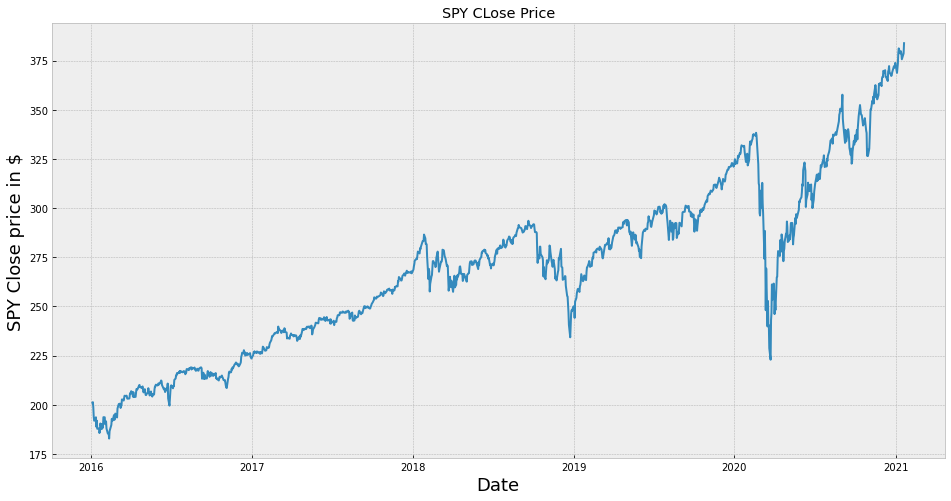

In [28]:
plt.figure(figsize=(16,8))
plt.title("SPY CLose Price")
plt.plot(spy["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("SPY Close price in $", fontsize=18)

In [29]:
data = covid_spy.filter(['Close'])
dataset = data.values
len(dataset)

231

In [30]:
training_data_size = math.ceil(len(dataset)*.7)
training_data_size

162

In [31]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.68677769],
       [0.61805645],
       [0.55735049],
       [0.550205  ],
       [0.46327827],
       [0.4555114 ],
       [0.53523046],
       [0.48024099],
       [0.55865527],
       [0.49403496],
       [0.46296748],
       [0.31862811],
       [0.40679762],
       [0.31943571],
       [0.15633156],
       [0.28811983],
       [0.10500812],
       [0.18547286],
       [0.10594011],
       [0.10910896],
       [0.03634898],
       [0.        ],
       [0.12551258],
       [0.1481297 ],
       [0.23766628],
       [0.1893252 ],
       [0.24046224],
       [0.21622965],
       [0.14415307],
       [0.17944577],
       [0.15682865],
       [0.2604075 ],
       [0.26208527],
       [0.31738534],
       [0.3432957 ],
       [0.32751336],
       [0.37802911],
       [0.34056174],
       [0.3488878 ],
       [0.39573761],
       [0.36435934],
       [0.31123404],
       [0.3488878 ],
       [0.34876341],
       [0.372934  ],
       [0.39828497],
       [0.39008331],
       [0.436

In [45]:
train_data = scaled_data[0:training_data_size, :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-30:i, 0])
    y_train.append(train_data[i,0])
    if i<=31:
        print(x_train)
        print(y_train)

In [46]:
y_train = np.asarray(y_train)

In [47]:
x_train, Y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(102, 30, 1)

### Building Compiling training and testing the LSTM model

In [48]:
model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [49]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [62]:
model.fit(x_train, y_train, batch_size=5, epochs=10, shuffle = False)

Epoch 1/10
21/21 [==============================] - 0s 11ms/step - loss: 0.0038
Epoch 2/10
21/21 [==============================] - 0s 11ms/step - loss: 0.0030
Epoch 3/10
21/21 [==============================] - 0s 11ms/step - loss: 0.0030
Epoch 4/10
21/21 [==============================] - 0s 11ms/step - loss: 0.0033
Epoch 5/10
21/21 [==============================] - 0s 11ms/step - loss: 0.0040
Epoch 6/10
21/21 [==============================] - 0s 11ms/step - loss: 0.0048
Epoch 7/10
21/21 [==============================] - 0s 11ms/step - loss: 0.0060
Epoch 8/10
21/21 [==============================] - 0s 11ms/step - loss: 0.0073
Epoch 9/10
21/21 [==============================] - 0s 11ms/step - loss: 0.0085
Epoch 10/10
21/21 [==============================] - 0s 11ms/step - loss: 0.0093


In [63]:
test_data = scaled_data[training_data_size - 30: , :]
x_test = []
y_test = dataset[training_data_size:, :]
for i in range(30, len(test_data)):
    x_test.append(test_data[i-30:i, 0])

In [64]:
x_test = np.array(x_test)

In [65]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [66]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [67]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.9948960456295289

C:\Users\vmier\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<function matplotlib.pyplot.show(close=None, block=None)>

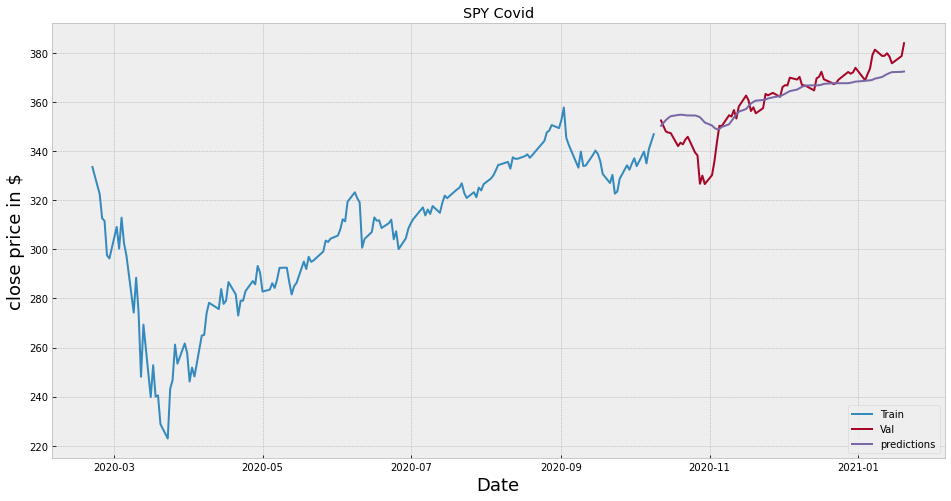

In [70]:
train = data[:training_data_size]
valid = data[training_data_size:]
valid['predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('SPY Covid')
plt.xlabel('Date', fontsize=18)
plt.ylabel('close price in $', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['Train', 'Val', 'predictions'], loc='lower right')
plt.show

In [69]:
valid

,Close,predictions
Date,,
2020-10-12,352.429993,350.259155
2020-10-13,350.130005,351.456238
2020-10-14,347.929993,352.587982
2020-10-15,347.500000,353.485779
2020-10-16,347.290009,354.164062
...,...,...
2021-01-13,379.790009,371.270660
2021-01-14,378.459991,371.752197
2021-01-15,375.700012,372.101807


In [71]:
covid_ccl = ccl['2020-02-21' :'2021-01-22']
covid_ccl.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-02-21,42.110001,42.189999,41.650002,41.689999,41.689999,8009800
2020-02-24,39.380001,39.750000,37.759998,37.759998,37.759998,15441400
2020-02-25,38.000000,38.110001,35.669998,35.840000,35.840000,16153700
2020-02-26,36.169998,36.189999,32.380001,33.139999,33.139999,23492300
2020-02-27,32.650002,33.700001,30.190001,31.850000,31.850000,31486400


Text(0, 0.5, 'CCL Close price in $')

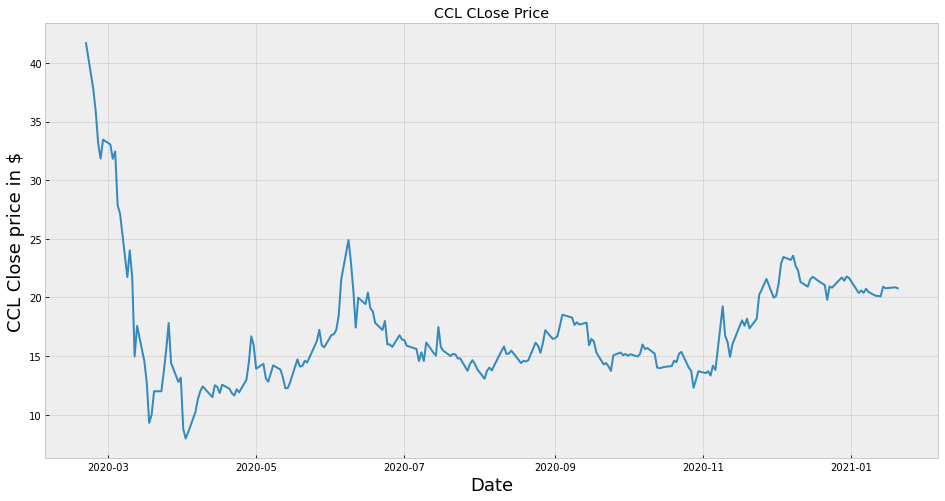

In [73]:
plt.figure(figsize=(16,8))
plt.title("CCL CLose Price")
plt.plot(covid_ccl["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("CCL Close price in $", fontsize=18)

In [75]:
data = covid_ccl.filter(['Close'])
dataset = data.values
len(dataset)

231

In [76]:
training_data_size = math.ceil(len(dataset)*.7)
training_data_size

162

In [77]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[1.        ],
       [0.88345194],
       [0.82651249],
       [0.7464413 ],
       [0.7081851 ],
       [0.7559312 ],
       [0.74406887],
       [0.70759196],
       [0.72627521],
       [0.59015426],
       [0.56880191],
       [0.408363  ],
       [0.47597868],
       [0.40865957],
       [0.20759195],
       [0.28499408],
       [0.19572954],
       [0.14056941],
       [0.03944248],
       [0.06020167],
       [0.11951365],
       [0.11951365],
       [0.16933573],
       [0.22479243],
       [0.29211151],
       [0.19098459],
       [0.14323845],
       [0.15421116],
       [0.02461448],
       [0.        ],
       [0.01542112],
       [0.06642943],
       [0.09875446],
       [0.11921709],
       [0.13196917],
       [0.10468566],
       [0.13463821],
       [0.13078293],
       [0.11506526],
       [0.13612102],
       [0.12603798],
       [0.1147687 ],
       [0.10883751],
       [0.12455517],
       [0.11684461],
       [0.14857651],
       [0.19246739],
       [0.258

In [78]:
train_data = scaled_data[0:training_data_size, :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-30:i, 0])
    y_train.append(train_data[i,0])
    if i<=31:
        print(x_train)
        print(y_train)

In [79]:
y_train = np.asarray(y_train)

In [80]:
x_train, Y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(102, 30, 1)

### Building Compiling training and testing the LSTM model

In [81]:
model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [82]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [83]:
model.fit(x_train, y_train, batch_size=5, epochs=10, shuffle = False)

Epoch 1/10
21/21 [==============================] - 3s 11ms/step - loss: 0.0263
Epoch 2/10
21/21 [==============================] - 0s 11ms/step - loss: 0.0059
Epoch 3/10
21/21 [==============================] - 0s 11ms/step - loss: 0.0048
Epoch 4/10
21/21 [==============================] - 0s 11ms/step - loss: 0.0040
Epoch 5/10
21/21 [==============================] - 0s 11ms/step - loss: 0.0040
Epoch 6/10
21/21 [==============================] - 0s 11ms/step - loss: 0.0039
Epoch 7/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0036
Epoch 8/10
21/21 [==============================] - 0s 11ms/step - loss: 0.0032
Epoch 9/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0028
Epoch 10/10
21/21 [==============================] - 0s 11ms/step - loss: 0.0026


In [84]:
test_data = scaled_data[training_data_size - 30: , :]
x_test = []
y_test = dataset[training_data_size:, :]
for i in range(30, len(test_data)):
    x_test.append(test_data[i-30:i, 0])

In [85]:
x_test = np.array(x_test)

In [86]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [87]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [88]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

2.3350825931714927

C:\Users\vmier\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<function matplotlib.pyplot.show(close=None, block=None)>

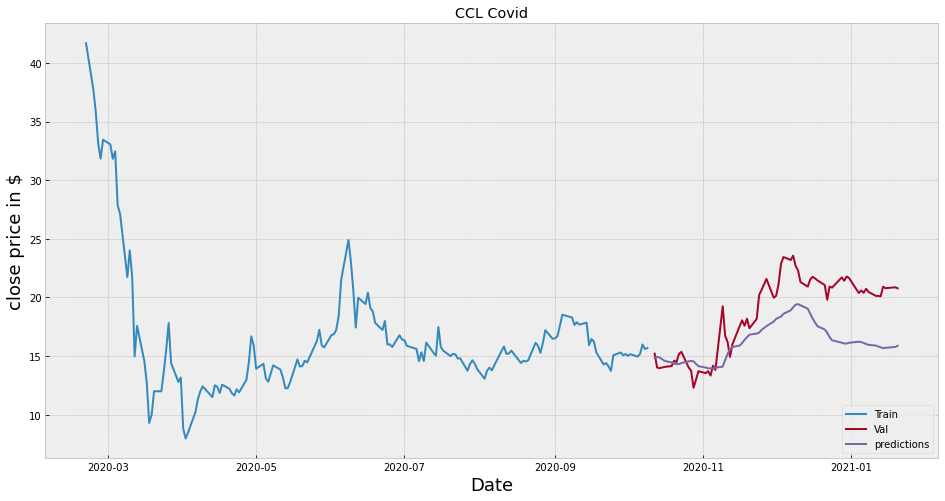

In [89]:
train = data[:training_data_size]
valid = data[training_data_size:]
valid['predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('CCL Covid')
plt.xlabel('Date', fontsize=18)
plt.ylabel('close price in $', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['Train', 'Val', 'predictions'], loc='lower right')
plt.show

In [90]:
valid

,Close,predictions
Date,,
2020-10-12,15.210000,14.853671
2020-10-13,14.030000,14.946005
2020-10-14,13.970000,14.886685
2020-10-15,14.020000,14.751086
2020-10-16,14.080000,14.596065
...,...,...
2021-01-13,20.100000,15.747932
2021-01-14,20.920000,15.679415
2021-01-15,20.790001,15.707992


In [94]:
covid_dal = dal['2020-02-21' :'2021-01-22']
covid_dal.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-02-21,57.959999,58.020000,56.869999,57.869999,57.869999,6295600
2020-02-24,54.830002,55.380001,53.340000,54.230000,54.230000,17983100
2020-02-25,54.540001,54.709999,50.750000,50.889999,50.889999,15836500
2020-02-26,51.439999,51.770000,49.000000,49.590000,49.590000,15985900
2020-02-27,46.720001,50.980000,45.029999,48.189999,48.189999,21949100


Text(0, 0.5, 'Delta Close price in $')

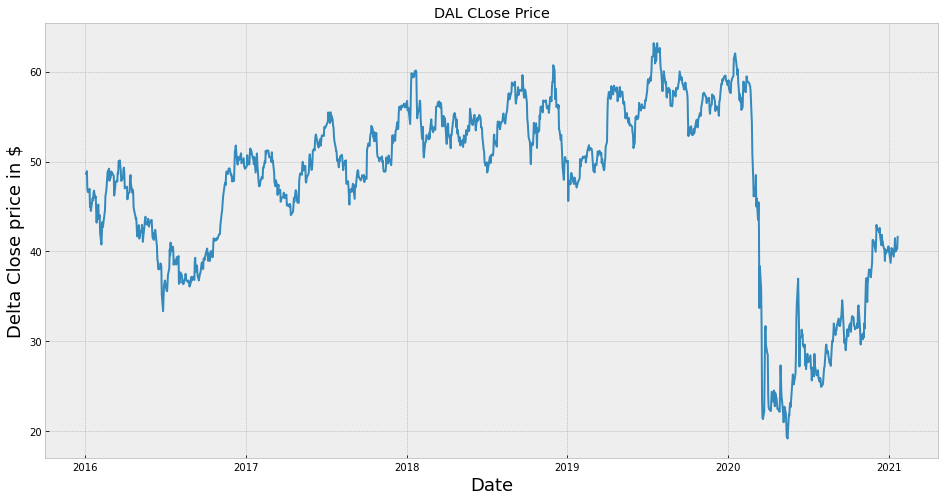

In [96]:
plt.figure(figsize=(16,8))
plt.title("DAL CLose Price")
plt.plot(dal["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Delta Close price in $", fontsize=18)

In [97]:
data = covid_dal.filter(['Close'])
dataset = data.values
len(dataset)

231

In [98]:
training_data_size = math.ceil(len(dataset)*.7)
training_data_size

162

In [99]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[1.        ],
       [0.90589453],
       [0.81954499],
       [0.78593591],
       [0.74974145],
       [0.69648401],
       [0.72311273],
       [0.69777665],
       [0.75775596],
       [0.66752841],
       [0.69027921],
       [0.62900726],
       [0.67942094],
       [0.60703202],
       [0.37538778],
       [0.49560499],
       [0.42967946],
       [0.32445708],
       [0.11116855],
       [0.05997931],
       [0.05584281],
       [0.07833503],
       [0.19906927],
       [0.30791107],
       [0.32342298],
       [0.26783865],
       [0.2450879 ],
       [0.24146847],
       [0.12099277],
       [0.09022751],
       [0.08505685],
       [0.08092035],
       [0.07911064],
       [0.10444672],
       [0.13443638],
       [0.1049638 ],
       [0.13831439],
       [0.13340228],
       [0.09281283],
       [0.13133403],
       [0.11504651],
       [0.10108583],
       [0.08479832],
       [0.08505685],
       [0.08324714],
       [0.07678385],
       [0.13314374],
       [0.210

In [100]:
train_data = scaled_data[0:training_data_size, :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-30:i, 0])
    y_train.append(train_data[i,0])
    if i<=31:
        print(x_train)
        print(y_train)

In [101]:
y_train = np.asarray(y_train)

In [102]:
x_train, Y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(102, 30, 1)

### Building Compiling training and testing the LSTM model

In [103]:
model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [104]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [105]:
model.fit(x_train, y_train, batch_size=5, epochs=10, shuffle = False)

Epoch 1/10
21/21 [==============================] - 3s 12ms/step - loss: 0.0175
Epoch 2/10
21/21 [==============================] - 0s 11ms/step - loss: 0.0086
Epoch 3/10
21/21 [==============================] - 0s 11ms/step - loss: 0.0063
Epoch 4/10
21/21 [==============================] - 0s 11ms/step - loss: 0.0055
Epoch 5/10
21/21 [==============================] - 0s 11ms/step - loss: 0.0054
Epoch 6/10
21/21 [==============================] - 0s 11ms/step - loss: 0.0052
Epoch 7/10
21/21 [==============================] - 0s 11ms/step - loss: 0.0050
Epoch 8/10
21/21 [==============================] - 0s 11ms/step - loss: 0.0048
Epoch 9/10
21/21 [==============================] - 0s 11ms/step - loss: 0.0046
Epoch 10/10
21/21 [==============================] - 0s 11ms/step - loss: 0.0044


In [106]:
test_data = scaled_data[training_data_size - 30: , :]
x_test = []
y_test = dataset[training_data_size:, :]
for i in range(30, len(test_data)):
    x_test.append(test_data[i-30:i, 0])

In [107]:
x_test = np.array(x_test)

In [108]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [109]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [110]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

3.5309649757716968

C:\Users\vmier\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<function matplotlib.pyplot.show(close=None, block=None)>

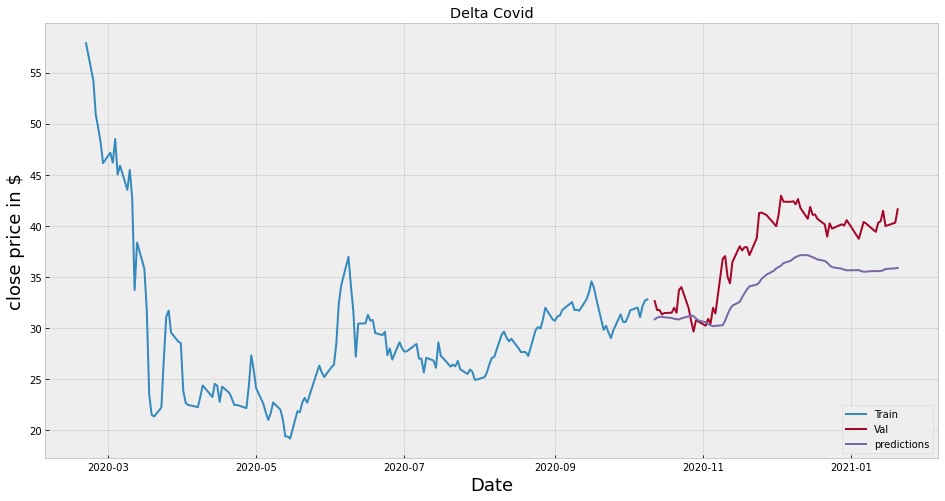

In [111]:
train = data[:training_data_size]
valid = data[training_data_size:]
valid['predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Delta Covid')
plt.xlabel('Date', fontsize=18)
plt.ylabel('close price in $', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['Train', 'Val', 'predictions'], loc='lower right')
plt.show

In [112]:
valid

,Close,predictions
Date,,
2020-10-12,32.639999,30.851671
2020-10-13,31.770000,31.016060
2020-10-14,31.760000,31.087626
2020-10-15,31.340000,31.101521
2020-10-16,31.469999,31.052158
...,...,...
2021-01-13,40.450001,35.588802
2021-01-14,41.470001,35.643448
2021-01-15,39.980000,35.781555


In [114]:
etsy_covid = etsy['2020-02-21' :'2021-01-22']
etsy_covid.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-02-21,54.180000,54.270000,52.840000,53.700001,53.700001,2006000
2020-02-24,50.970001,51.939999,50.060001,51.330002,51.330002,3818600
2020-02-25,52.049999,52.759998,49.200001,49.889999,49.889999,3998100
2020-02-26,50.290001,52.650002,50.000000,50.689999,50.689999,6523100
2020-02-27,55.424999,60.080002,53.810001,57.919998,57.919998,13157400


Text(0, 0.5, 'SPY Close price in $')

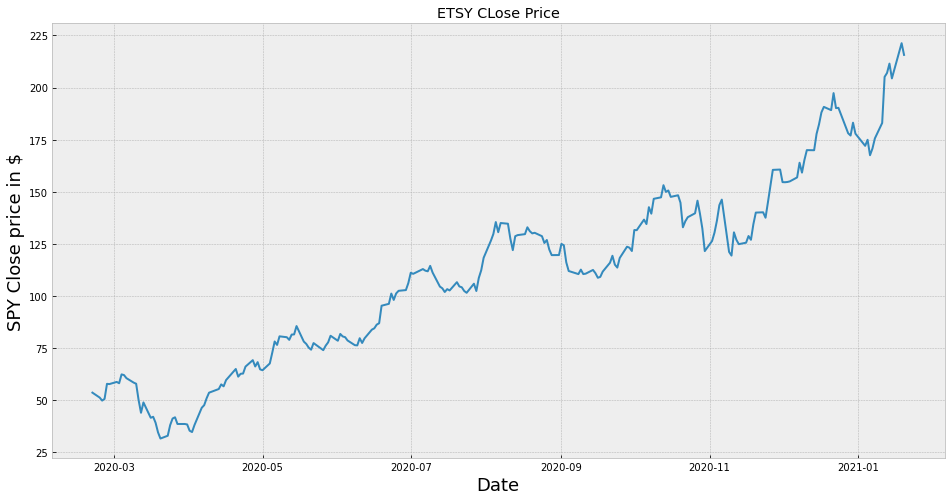

In [116]:
plt.figure(figsize=(16,8))
plt.title("ETSY CLose Price")
plt.plot(etsy_covid["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("SPY Close price in $", fontsize=18)

In [117]:
data = etsy_covid.filter(['Close'])
dataset = data.values
len(dataset)

231

In [118]:
training_data_size = math.ceil(len(dataset)*.7)
training_data_size

162

In [119]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.11607426],
       [0.10357558],
       [0.09598143],
       [0.10020039],
       [0.13832928],
       [0.13774919],
       [0.1431811 ],
       [0.13985866],
       [0.16227191],
       [0.16053159],
       [0.15272651],
       [0.14138804],
       [0.13859298],
       [0.09777449],
       [0.06513026],
       [0.09134057],
       [0.05252611],
       [0.05500474],
       [0.03986921],
       [0.0156629 ],
       [0.        ],
       [0.00706676],
       [0.03396267],
       [0.05062757],
       [0.05373906],
       [0.03681045],
       [0.03681045],
       [0.0355975 ],
       [0.01982913],
       [0.01640122],
       [0.03406814],
       [0.07789262],
       [0.08437928],
       [0.10183525],
       [0.11596878],
       [0.12525049],
       [0.13695813],
       [0.13200085],
       [0.14782197],
       [0.15488873],
       [0.17593083],
       [0.15652357],
       [0.16380129],
       [0.16432865],
       [0.18194285],
       [0.19823858],
       [0.18225926],
       [0.193

In [120]:
train_data = scaled_data[0:training_data_size, :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-30:i, 0])
    y_train.append(train_data[i,0])
    if i<=31:
        print(x_train)
        print(y_train)

In [121]:
y_train = np.asarray(y_train)

In [122]:
x_train, Y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(102, 30, 1)

### Building Compiling training and testing the LSTM model

In [123]:
model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [124]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [125]:
model.fit(x_train, y_train, batch_size=5, epochs=10, shuffle = False)

Epoch 1/10
21/21 [==============================] - 13s 66ms/step - loss: 0.0340
Epoch 2/10
21/21 [==============================] - 2s 91ms/step - loss: 0.0058
Epoch 3/10
21/21 [==============================] - 2s 74ms/step - loss: 0.0047
Epoch 4/10
21/21 [==============================] - 1s 68ms/step - loss: 0.0034
Epoch 5/10
21/21 [==============================] - 2s 75ms/step - loss: 0.0026
Epoch 6/10
21/21 [==============================] - 2s 80ms/step - loss: 0.0023: 1s 
Epoch 7/10
21/21 [==============================] - 2s 72ms/step - loss: 0.0021
Epoch 8/10
21/21 [==============================] - 2s 77ms/step - loss: 0.0020
Epoch 9/10
21/21 [==============================] - 2s 73ms/step - loss: 0.0019: 0s - loss: 0.001
Epoch 10/10
21/21 [==============================] - 2s 80ms/step - loss: 0.0018


In [126]:
test_data = scaled_data[training_data_size - 30: , :]
x_test = []
y_test = dataset[training_data_size:, :]
for i in range(30, len(test_data)):
    x_test.append(test_data[i-30:i, 0])

In [127]:
x_test = np.array(x_test)

In [128]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [129]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [130]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

14.150389519290648

C:\Users\vmier\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<function matplotlib.pyplot.show(close=None, block=None)>

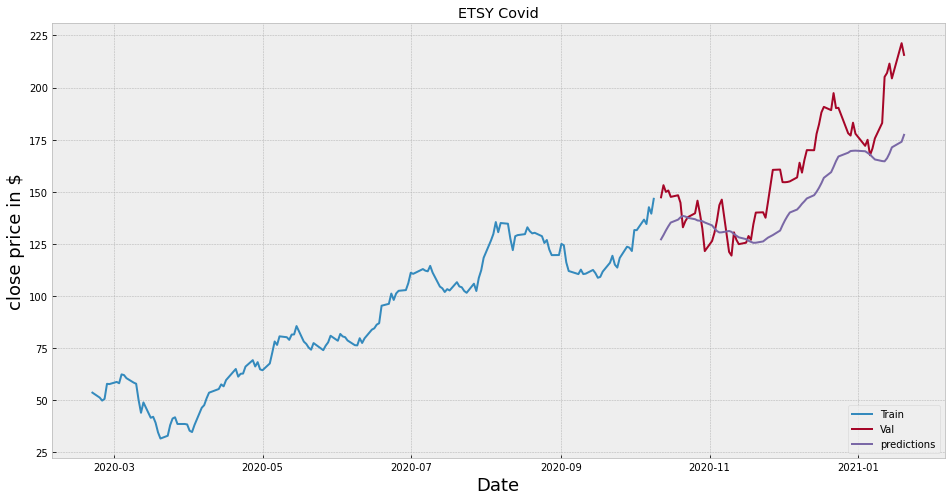

In [132]:
train = data[:training_data_size]
valid = data[training_data_size:]
valid['predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('ETSY Covid')
plt.xlabel('Date', fontsize=18)
plt.ylabel('close price in $', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['Train', 'Val', 'predictions'], loc='lower right')
plt.show

In [134]:
covid_pp = PP['2020-02-21' :'2021-01-22']
covid_pp.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-02-21,121.720001,121.849998,118.529999,119.489998,119.489998,5894500
2020-02-24,114.290001,116.790001,113.519997,116.440002,116.440002,10139300
2020-02-25,115.669998,116.415001,109.330002,109.660004,109.660004,13636100
2020-02-26,109.809998,112.629997,108.599998,109.110001,109.110001,10301800
2020-02-27,106.300003,112.050003,106.300003,107.839996,107.839996,15461900


Text(0.5, 0, 'Date')

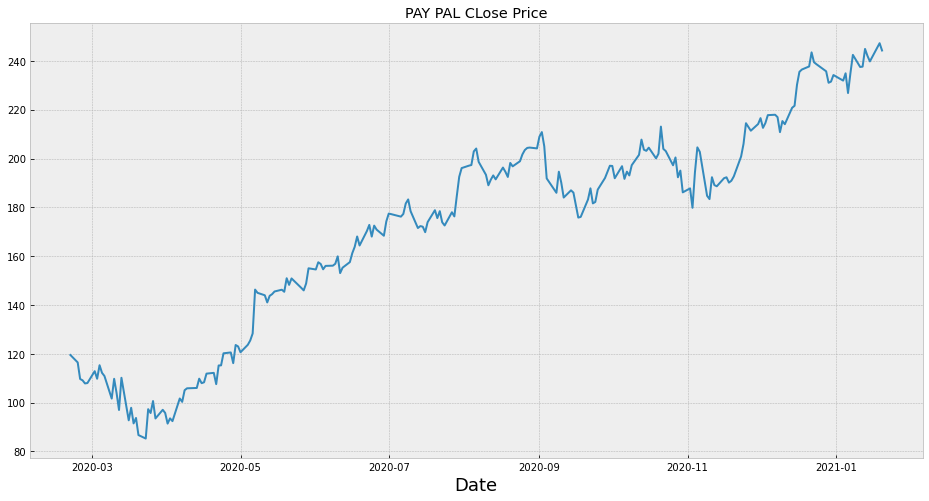

In [137]:
plt.figure(figsize=(16,8))
plt.title("PAY PAL CLose Price")
plt.plot(covid_pp["Close"])
plt.xlabel("Date", fontsize=18)

In [139]:
data = covid_pp.filter(['Close'])
dataset = data.values
len(dataset)

231

In [140]:
training_data_size = math.ceil(len(dataset)*.7)
training_data_size

162

In [141]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.21130932],
       [0.19248102],
       [0.15062659],
       [0.1472313 ],
       [0.13939129],
       [0.14031728],
       [0.17038088],
       [0.15124391],
       [0.18544355],
       [0.16618309],
       [0.15821963],
       [0.10105559],
       [0.15112042],
       [0.11506883],
       [0.07222666],
       [0.15365146],
       [0.04605222],
       [0.07784432],
       [0.03827395],
       [0.05204025],
       [0.00876596],
       [0.        ],
       [0.07426384],
       [0.06451014],
       [0.09488237],
       [0.05074388],
       [0.07265879],
       [0.06469533],
       [0.03778008],
       [0.05099077],
       [0.04401505],
       [0.10130253],
       [0.09272175],
       [0.12222974],
       [0.12704485],
       [0.12790914],
       [0.15139825],
       [0.14007034],
       [0.14229271],
       [0.16414591],
       [0.16612134],
       [0.13753935],
       [0.1847645 ],
       [0.18507313],
       [0.21556885],
       [0.21772947],
       [0.19062904],
       [0.236

In [142]:
train_data = scaled_data[0:training_data_size, :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-30:i, 0])
    y_train.append(train_data[i,0])
    if i<=31:
        print(x_train)
        print(y_train)

In [143]:
y_train = np.asarray(y_train)

In [144]:
x_train, Y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(102, 30, 1)

### Building Compiling training and testing the LSTM model

In [145]:
model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [146]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [147]:
model.fit(x_train, y_train, batch_size=5, epochs=10, shuffle = False)

Epoch 1/10
21/21 [==============================] - 16s 97ms/step - loss: 0.0656
Epoch 2/10
21/21 [==============================] - 2s 104ms/step - loss: 0.0017ETA: 1s - loss: - ETA: 0s - loss: 0.00
Epoch 3/10
21/21 [==============================] - 2s 89ms/step - loss: 0.0020 ETA: 1s - lo - ETA: 0s - loss: 0.
Epoch 4/10
21/21 [==============================] - 2s 82ms/step - loss: 0.0027 ETA: 1s - loss: 4.2003e- - ETA: 1s - l
Epoch 5/10
21/21 [==============================] - 2s 87ms/step - loss: 0.0036
Epoch 6/10
21/21 [==============================] - 1s 69ms/step - loss: 0.0050
Epoch 7/10
21/21 [==============================] - 2s 77ms/step - loss: 0.0066
Epoch 8/10
21/21 [==============================] - 2s 76ms/step - loss: 0.0094
Epoch 9/10
21/21 [==============================] - 2s 81ms/step - loss: 0.0106
Epoch 10/10
21/21 [==============================] - 2s 89ms/step - loss: 0.0097


In [148]:
test_data = scaled_data[training_data_size - 30: , :]
x_test = []
y_test = dataset[training_data_size:, :]
for i in range(30, len(test_data)):
    x_test.append(test_data[i-30:i, 0])

In [149]:
x_test = np.array(x_test)

In [150]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [151]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [152]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

2.6442028543223506

C:\Users\vmier\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<function matplotlib.pyplot.show(close=None, block=None)>

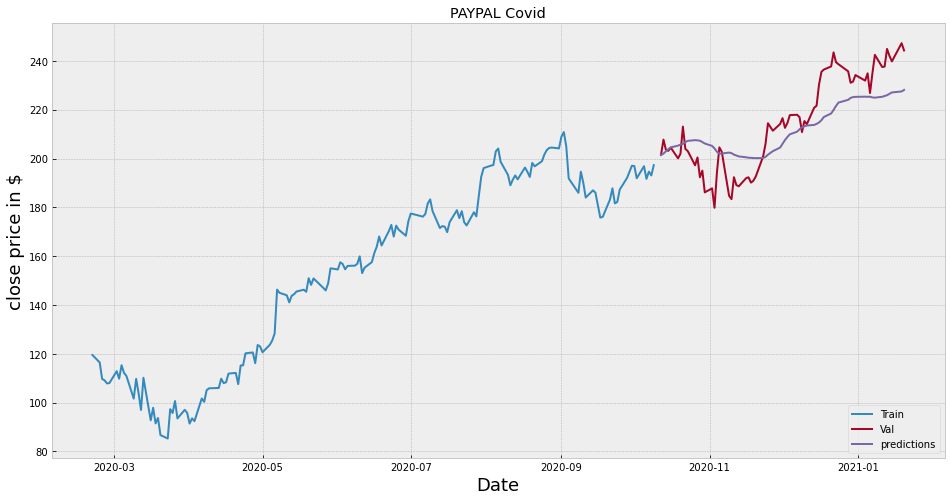

In [154]:
train = data[:training_data_size]
valid = data[training_data_size:]
valid['predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('PAYPAL Covid')
plt.xlabel('Date', fontsize=18)
plt.ylabel('close price in $', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['Train', 'Val', 'predictions'], loc='lower right')
plt.show

In [155]:
valid

,Close,predictions
Date,,
2020-10-12,201.509995,201.414215
2020-10-13,207.740005,201.998306
2020-10-14,203.600006,202.935043
2020-10-15,203.139999,203.806992
2020-10-16,204.449997,204.565613
...,...,...
2021-01-13,244.899994,225.924973
2021-01-14,242.059998,226.510223
2021-01-15,239.789993,227.068207
